# Predict CTR of an Email Campaign


Can you predict the Click Through Rate (CTR) of an email campaign?



## Problem Statement


Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.


Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).


CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.


CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered


CTR depends on multiple factors like design, content, personalization, etc. 


* How do you design the email content effectively?
* What should your subject line look like?
* What should be the length of the email?
* Do you need images in your email template?

As a part of the Data Science team, in this hackathon, you will build a smart system to **predict the CTR for email campaigns** and therefore **identify the critical factors that will help the marketing team to maximize the CTR.**



## Objective

Your task at hand is to build a machine learning-based approach to predict the CTR of an email campaign.


## About the Dataset

You are provided with the information of past email campaigns containing the email attributes like subject and body length, no. of CTA, date and time of an email, type of the audience, whether its a personalized email or not, etc and the target variable indicating the CTR of the email campaign.


## Data Dictionary


You are provided with 3 files - `train.csv`, `test.csv` and `sample_submission.csv`

`train.csv`
| Variable | Description |
| --- | --- |
| campaign_id | Unique identifier of a campaign |
| sender | Sender of an e-mail |
| subject_len | No. of characters in a subject |
| body_len | No. of characters in an email body |
| mean_paragraph_len | Average no. of characters in paragraph of an email |
| day_of_week | Day on which email is sent |
| is_weekend | Boolean flag indicating if an email is sent on weekend or not |
| times_of_day | Times of day when email is sent: Morning, Noon, Evening |
| category | Category of the product an email is related to |
| product | Type of the product an email is related to |
| no_of_CTA | No. of Call To Actions in an email |
| mean_CTA_len | Average no. of characters in a CTA |
| is_image | No. of images in an email |
| is_personalised | Boolean flag indicating if an email is personalized to the user or not |
| is_quote | No. of quotes in an email |
| is_timer | Boolean flag indicating if an email contains a timer or not |
| is_emoticons | No. of emoticons in an email |
| is_discount | Boolean flag indicating if an email contains a discount or not |
| is_price | Boolean flag indicating if an email contains price or not |
| is_urgency | Boolean flag indicating if an email contains urgency or not |
| target_audience | Cluster label of the target audience |
| click_rate (Target Variable) | Click rate of an email campaign |


`sample_submission.csv`

| Variable | Description |
| --- | --- |
| campaign_id | Unique Identifier of a campaign id |
| click_rate (Target Variable) | Click rate of an email campaign |


## Train and Test Set


Train and Test set contains different sets of email campaigns containing information about the email campaign. Train set includes the target variable click_rate and you need to predict the click_rate of an email campaign in the test set.


## Submission File Format


sample_submission.csv contains 2 variables - `campaign id` and `click_rate`


## Evaluation metric

The evaluation metric for this hackathon would be `r2_score`

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [176]:
train_data = "data/train.csv"
test_data_path = "data/test.csv"
submission_file_path = "data/sample_submission.csv"

In [177]:
train_df = pd.read_csv(train_data)
train_df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [178]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

### Obervation:

* We have one categorical variable and others are numeric

In [179]:
train_df.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


### Time of the day

In [180]:
train_df.times_of_day.value_counts()

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64

<AxesSubplot:>

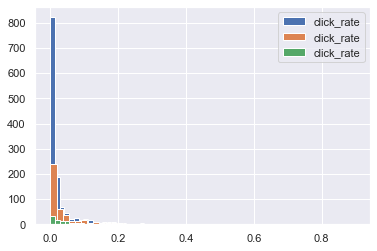

In [181]:
train_df.query("times_of_day=='Evening'")['click_rate'].hist(bins=50, legend='Evening')
train_df.query("times_of_day=='Noon'")['click_rate'].hist(bins=50, legend='Noon')
train_df.query("times_of_day=='Morning'")['click_rate'].hist(bins=50, legend='Morning')

### Sender

In [182]:
train_df.sender.value_counts()

3     1559
10     181
15      89
6       22
9       13
14       7
11       7
0        3
12       3
7        2
2        1
1        1
Name: sender, dtype: int64

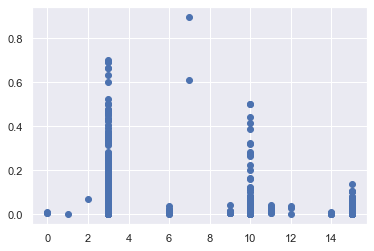

In [183]:
plt.scatter(train_df.sender,  train_df.click_rate)

### Category

<AxesSubplot:>

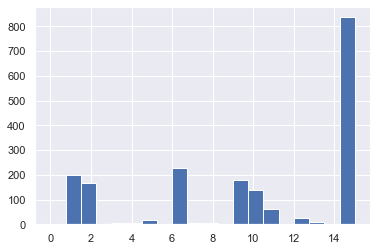

In [184]:
train_df.category.hist(bins=20)

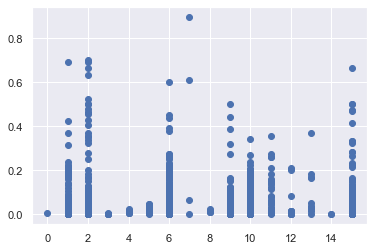

In [185]:
plt.scatter(train_df.category,  train_df.click_rate)

<AxesSubplot:>

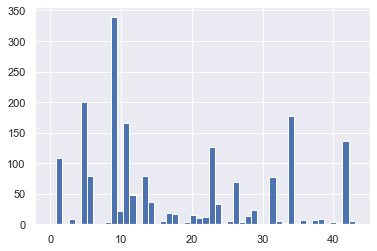

In [186]:
train_df['product'].hist(bins=50)

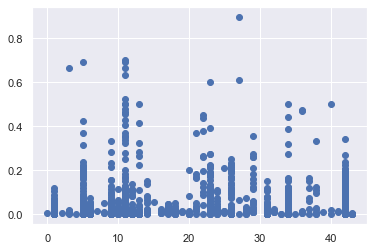

In [187]:
plt.scatter(train_df['product'],  train_df.click_rate)

<AxesSubplot:>

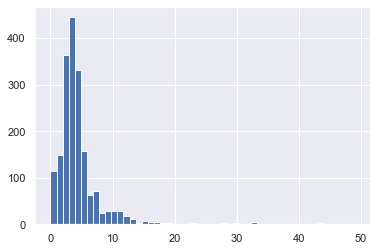

In [188]:
train_df.no_of_CTA.hist(bins=50)

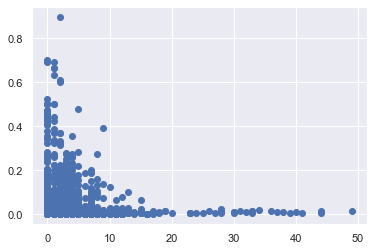

In [189]:
plt.scatter(train_df['no_of_CTA'],  train_df.click_rate)

<AxesSubplot:>

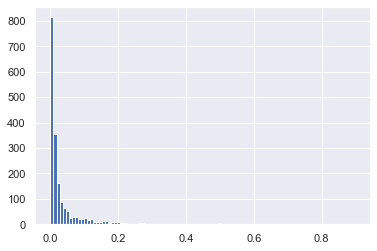

In [190]:
train_df.click_rate.hist(bins=100)

In [191]:
train_df.is_personalised.value_counts()

0    1781
1     107
Name: is_personalised, dtype: int64

In [192]:
train_df.is_price.value_counts()

0        1875
5499        5
8000        2
5000        2
4999        1
1399        1
1000        1
14999       1
Name: is_price, dtype: int64

`is_price` doesn't justify much since all the values are almost zero. its better if we drop it. or may be we can create boolean variable

In [193]:
train_df.is_personalised.value_counts()

0    1781
1     107
Name: is_personalised, dtype: int64

In [194]:
train_df.is_weekend.value_counts()

0    1511
1     377
Name: is_weekend, dtype: int64

In [195]:
train_df.is_discount.value_counts()

0    1813
1      75
Name: is_discount, dtype: int64

In [196]:
train_df.is_emoticons.value_counts()

0    1626
1     172
2      54
3      30
4       4
6       2
Name: is_emoticons, dtype: int64

In [197]:
train_df.is_quote.value_counts()

0    885
1    638
2    227
3     93
4     27
5     12
6      6
Name: is_quote, dtype: int64

In [198]:
train_df.is_urgency.value_counts()

0    1676
1     212
Name: is_urgency, dtype: int64

In [199]:
train_df.is_timer.value_counts()

0    1888
Name: is_timer, dtype: int64

we can also drop `is_timer` column since it has the same value all the time

In [200]:
train_df.target_audience.value_counts()

12    1169
14     175
10     136
16     132
15      61
7       56
1       50
2       20
5       16
6       14
11      12
4       10
13      10
3        9
8        9
9        6
0        3
Name: target_audience, dtype: int64

In [201]:
train_df = train_df.set_index(['campaign_id'], drop=True)

In [202]:
correlation = train_df.corr(method='pearson')
columns = correlation.nlargest(20, 'click_rate').index
columns

Index(['click_rate', 'mean_paragraph_len', 'product', 'is_weekend',
       'day_of_week', 'target_audience', 'is_personalised', 'is_image',
       'is_price', 'mean_CTA_len', 'sender', 'is_discount', 'is_emoticons',
       'is_quote', 'is_urgency', 'category', 'no_of_CTA', 'subject_len',
       'body_len', 'is_timer'],
      dtype='object')

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

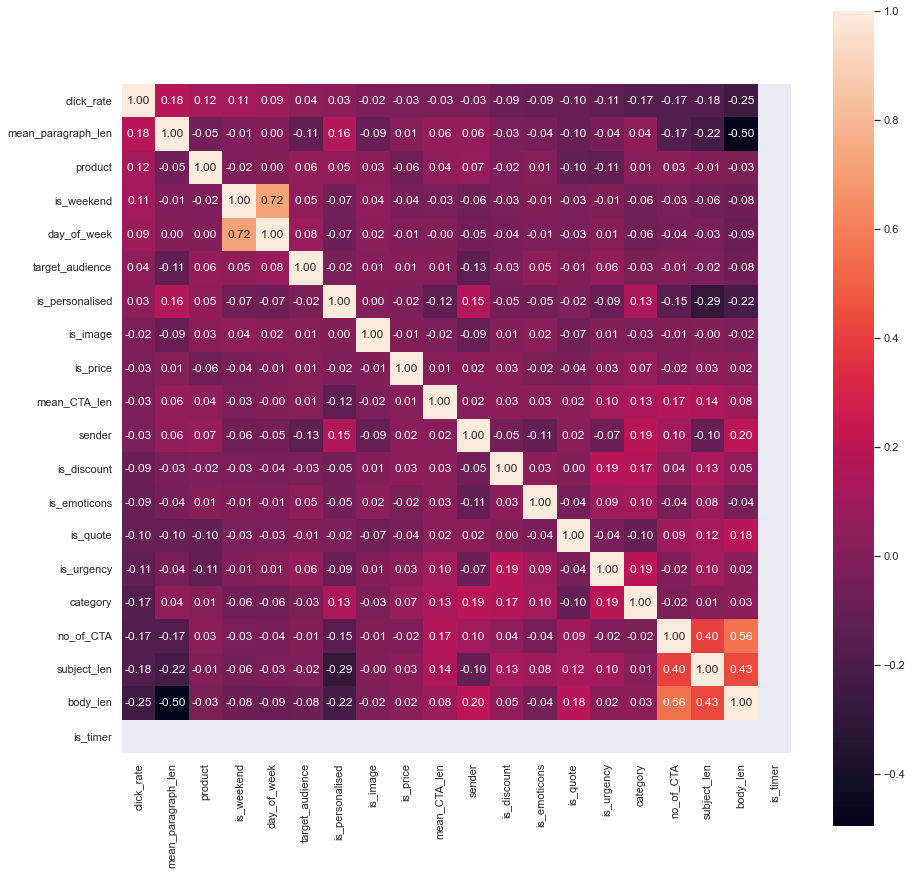

In [204]:
plt.figure(figsize=(15,15)) 
correlation_map = np.corrcoef(train_df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

## Filter Related Features

In [205]:
train_df.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product',
       'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_timer', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'click_rate'],
      dtype='object')

## Feature Engineering

1) Subject Length

<AxesSubplot:>

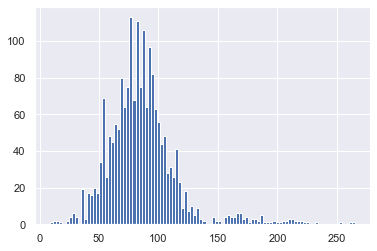

In [206]:
train_df.subject_len.hist(bins=100)

In [258]:
sub_len_bins = [-1, 75, 92, float('inf')]
sub_len_labels = ["small_sub_len", "medium_sub_len", "large_sub_len"]
train_df['sub_len'] = pd.cut(train_df['subject_len'], bins=sub_len_bins, labels=sub_len_labels)
train_df['sub_len'].value_counts(normalize=True)

small_sub_len     0.350636
large_sub_len     0.331038
medium_sub_len    0.318326
Name: sub_len, dtype: float64

2) Body Length

<AxesSubplot:>

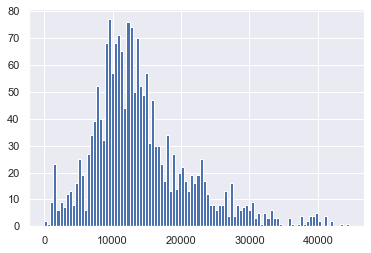

In [259]:
train_df.body_len.hist(bins=100)

In [260]:
train_df.target_audience

campaign_id
1       14
2       10
3       16
4       10
5       14
        ..
1884    10
1885    11
1886     6
1887    16
1888    10
Name: target_audience, Length: 1888, dtype: int64

In [261]:
body_len_bins = [-1, 10500, 15000, float('inf')]
body_len_labels = ["small_bod_len", "medium_bod_len", "large_bod_len"]
train_df['bod_len'] = pd.cut(train_df['body_len'], bins=body_len_bins, labels=body_len_labels)
train_df['bod_len'].value_counts(normalize=True)

large_bod_len     0.342691
medium_bod_len    0.329449
small_bod_len     0.327860
Name: bod_len, dtype: float64

3) mean paragraph length

<AxesSubplot:>

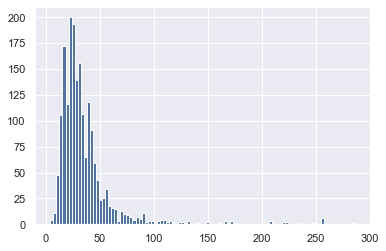

In [262]:
train_df.mean_paragraph_len.hist(bins=100)

In [263]:
para_len_bins = [-1, 22, 35, float('inf')]
para_len_labels = ["small_para_len", "medium_para_len", "large_para_len"]
train_df['para_len'] = pd.cut(train_df['mean_paragraph_len'], bins=para_len_bins, labels=para_len_labels)
train_df['para_len'].value_counts(normalize=True)

medium_para_len    0.353284
large_para_len     0.336864
small_para_len     0.309852
Name: para_len, dtype: float64

<AxesSubplot:>

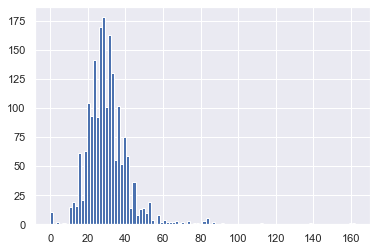

In [264]:
train_df.mean_CTA_len.hist(bins=100)

In [265]:
para_len_bins = [-1, 25, 33, float('inf')]
para_len_labels = ["small_cta_len", "medium_cta_len", "large_cta_len"]
train_df['cta_len'] = pd.cut(train_df['mean_CTA_len'], bins=para_len_bins, labels=para_len_labels)
train_df['cta_len'].value_counts().sum()

1888

4) Boolean Variables

In [266]:
train_df.is_emoticons = train_df.is_emoticons.apply(lambda value: 0 if value==0 else 1)
train_df.is_quote = train_df.is_quote.apply(lambda value: 0 if value==0 else 1)
train_df.is_price = train_df.is_price.apply(lambda value: 0 if value==0 else 1)

In [267]:
train_df.is_emoticons.value_counts()

0    1626
1     262
Name: is_emoticons, dtype: int64

In [268]:
train_df.is_quote.value_counts()

1    1003
0     885
Name: is_quote, dtype: int64

In [269]:
train_df.is_price.value_counts()

0    1875
1      13
Name: is_price, dtype: int64

In [270]:
train_df.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product',
       'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_timer', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'click_rate', 'sub_len', 'bod_len', 'para_len',
       'cta_len'],
      dtype='object')

## Create Simple Regressor using Catboost

In [271]:
train_y = train_df['click_rate']
# train_X = train_df.drop(["click_rate", "campaign_id", 'subject_len', 'body_len',
#        'mean_paragraph_len'], axis=1)

train_X = train_df.drop(["click_rate", "is_timer"], axis=1)

In [272]:
dict(enumerate(train_X.columns))

{0: 'sender',
 1: 'subject_len',
 2: 'body_len',
 3: 'mean_paragraph_len',
 4: 'day_of_week',
 5: 'is_weekend',
 6: 'times_of_day',
 7: 'category',
 8: 'product',
 9: 'no_of_CTA',
 10: 'mean_CTA_len',
 11: 'is_image',
 12: 'is_personalised',
 13: 'is_quote',
 14: 'is_emoticons',
 15: 'is_discount',
 16: 'is_price',
 17: 'is_urgency',
 18: 'target_audience',
 19: 'sub_len',
 20: 'bod_len',
 21: 'para_len',
 22: 'cta_len'}

In [273]:
cat_features = [0, 6, 7, 8, 18, 19, 20, 21, 22]
# cat_features = [6]

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.25, random_state=18)

In [277]:
from catboost import CatBoostRegressor
cb_reg = CatBoostRegressor(random_seed=13, verbose=200, iterations=1000, eval_metric='R2', loss_function='RMSE')
cb_reg.fit(X_train, y_train, cat_features=cat_features, plot=True, eval_set=(X_val, y_val))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.053779
0:	learn: 0.0207758	test: 0.0151806	best: 0.0151806 (0)	total: 17.3ms	remaining: 17.3s
200:	learn: 0.7277047	test: 0.3861919	best: 0.3861919 (200)	total: 7.96s	remaining: 31.7s
400:	learn: 0.8352584	test: 0.4405203	best: 0.4405203 (400)	total: 16.1s	remaining: 24s
600:	learn: 0.8856751	test: 0.4631134	best: 0.4637454 (597)	total: 24.6s	remaining: 16.3s
800:	learn: 0.9136252	test: 0.4694881	best: 0.4710838 (692)	total: 32.6s	remaining: 8.09s
999:	learn: 0.9292416	test: 0.4767310	best: 0.4767310 (999)	total: 41.8s	remaining: 0us

bestTest = 0.4767310048
bestIteration = 999



In [280]:
cb_learn_rate = 0.006
n_iterations = 80000
early_stop_rounds = 400

opt_catboost_params = {'iterations' : n_iterations,
                       'learning_rate' : cb_learn_rate,
                       'depth': 7,
                       'bootstrap_type' : 'Bernoulli',
                       'random_strength': 1,
                       'min_data_in_leaf': 10,
                       'l2_leaf_reg': 3,
                       'loss_function' : 'RMSE', 
                       'eval_metric' : 'R2',
                       'grow_policy' : 'Depthwise',
                       'max_bin' : 1024, 
                       'model_size_reg' : 0,
                       'task_type' : 'CPU',
                       'od_type' : 'IncToDec',
                       'od_wait' : 100,
                       'metric_period' : 500,
                       'verbose' : 500,
                       'subsample' : 0.8,
                       'od_pval' : 1e-10,
                       'has_time': False,
                       'random_seed' : 13}

In [281]:
cb_reg = CatBoostRegressor(**opt_catboost_params)

cb_reg.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_val, y_val), 
           use_best_model=True, plot=True, 
           early_stopping_rounds=early_stop_rounds)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0031787	test: -0.0020876	best: -0.0020876 (0)	total: 42.8ms	remaining: 57m 3s
500:	learn: 0.5907136	test: 0.3346065	best: 0.3349459 (498)	total: 19.2s	remaining: 50m 39s
1000:	learn: 0.7070883	test: 0.3663276	best: 0.3663276 (1000)	total: 37.3s	remaining: 49m 4s
1500:	learn: 0.7762076	test: 0.3930223	best: 0.3930223 (1500)	total: 54.9s	remaining: 47m 53s
2000:	learn: 0.8251870	test: 0.4105143	best: 0.4105143 (2000)	total: 1m 12s	remaining: 47m 2s
2500:	learn: 0.8600628	test: 0.4226872	best: 0.4226872 (2500)	total: 1m 30s	remaining: 46m 37s
3000:	learn: 0.8850930	test: 0.4279810	best: 0.4280475 (2996)	total: 1m 48s	remaining: 46m 15s
3500:	learn: 0.9041478	test: 0.4323450	best: 0.4323702 (3498)	total: 2m 6s	remaining: 45m 54s
4000:	learn: 0.9186611	test: 0.4355689	best: 0.4356818 (3983)	total: 2m 23s	remaining: 45m 34s
4500:	learn: 0.9305482	test: 0.4387241	best: 0.4388193 (4460)	total: 2m 42s	remaining: 45m 18s
5000:	learn: 0.9403202	test: 0.4407101	best: 0.4407743 (4996)	t

In [282]:
cb_learn_rate = 0.006
n_iterations = 12000
early_stop_rounds = 400

opt_catboost_params = {'iterations' : n_iterations,
                       'learning_rate' : cb_learn_rate,
                       'depth': 7,
                       'bootstrap_type' : 'Bernoulli',
                       'random_strength': 1,
                       'min_data_in_leaf': 10,
                       'l2_leaf_reg': 3,
                       'eval_metric' : 'R2',
                       'grow_policy' : 'Depthwise',
                       'max_bin' : 1024, 
                       'model_size_reg' : 0,
                       'task_type' : 'CPU',
                       'od_type' : 'IncToDec',
                       'od_wait' : 100,
                       'metric_period' : 500,
                       'verbose' : 500,
                       'subsample' : 0.8,
                       'od_pval' : 1e-10,
                       'has_time': False,
                       'random_seed' : 13}

cb_reg = CatBoostRegressor(**opt_catboost_params)

cb_reg.fit(train_X, train_y, cat_features=cat_features)

0:	learn: 0.0036055	total: 45.2ms	remaining: 9m 2s
500:	learn: 0.6047951	total: 19.1s	remaining: 7m 18s
1000:	learn: 0.7097911	total: 37s	remaining: 6m 46s
1500:	learn: 0.7702164	total: 54.5s	remaining: 6m 21s
2000:	learn: 0.8141602	total: 1m 11s	remaining: 5m 59s
2500:	learn: 0.8452463	total: 1m 29s	remaining: 5m 41s
3000:	learn: 0.8701871	total: 1m 47s	remaining: 5m 22s
3500:	learn: 0.8885828	total: 2m 5s	remaining: 5m 4s
4000:	learn: 0.9042201	total: 2m 23s	remaining: 4m 47s
4500:	learn: 0.9165308	total: 2m 42s	remaining: 4m 29s
5000:	learn: 0.9271871	total: 3m	remaining: 4m 12s
5500:	learn: 0.9361898	total: 3m 18s	remaining: 3m 54s
6000:	learn: 0.9438519	total: 3m 37s	remaining: 3m 37s
6500:	learn: 0.9507240	total: 3m 56s	remaining: 3m 19s
7000:	learn: 0.9560548	total: 4m 14s	remaining: 3m 2s
7500:	learn: 0.9606999	total: 4m 34s	remaining: 2m 44s
8000:	learn: 0.9648714	total: 4m 53s	remaining: 2m 26s
8500:	learn: 0.9683042	total: 5m 12s	remaining: 2m 8s
9000:	learn: 0.9715391	total

## Create Submission File

In [283]:
test_df = pd.read_csv(test_data_path)
test_df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [284]:
test_df['sub_len'] = pd.cut(test_df['subject_len'], bins=sub_len_bins, labels=sub_len_labels)
test_df['bod_len'] = pd.cut(test_df['body_len'], bins=body_len_bins, labels=body_len_labels)
test_df['para_len'] = pd.cut(test_df['mean_paragraph_len'], bins=para_len_bins, labels=para_len_labels)
test_df['cta_len'] = pd.cut(test_df['mean_CTA_len'], bins=para_len_bins, labels=para_len_labels)

test_df.is_emoticons = test_df.is_emoticons.apply(lambda value: 0 if value==0 else 1)
test_df.is_quote = test_df.is_quote.apply(lambda value: 0 if value==0 else 1)
test_df.is_price = test_df.is_price.apply(lambda value: 0 if value==0 else 1)

In [285]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   campaign_id         762 non-null    int64   
 1   sender              762 non-null    int64   
 2   subject_len         762 non-null    int64   
 3   body_len            762 non-null    int64   
 4   mean_paragraph_len  762 non-null    int64   
 5   day_of_week         762 non-null    int64   
 6   is_weekend          762 non-null    int64   
 7   times_of_day        762 non-null    object  
 8   category            762 non-null    int64   
 9   product             762 non-null    int64   
 10  no_of_CTA           762 non-null    int64   
 11  mean_CTA_len        762 non-null    int64   
 12  is_image            762 non-null    int64   
 13  is_personalised     762 non-null    int64   
 14  is_quote            762 non-null    int64   
 15  is_timer            762 non-null    int6

In [286]:
test_ids = test_df['campaign_id']
test_df = test_df.drop(["campaign_id", "is_timer"], axis=1)

In [287]:
submission_df = pd.DataFrame(test_ids, columns=['campaign_id'])
submission_df.head()

,campaign_id
0,1889
1,1890
2,1891
3,1892
4,1893


In [288]:
# scaled_test_X = scaler.transform(test_df)
cb_predict = cb_reg.predict(test_df)
prediction = np.array([0 if item<0 else item for item in list(cb_predict)])
# r2_score(y_val, prediction)

In [289]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sender              762 non-null    int64   
 1   subject_len         762 non-null    int64   
 2   body_len            762 non-null    int64   
 3   mean_paragraph_len  762 non-null    int64   
 4   day_of_week         762 non-null    int64   
 5   is_weekend          762 non-null    int64   
 6   times_of_day        762 non-null    object  
 7   category            762 non-null    int64   
 8   product             762 non-null    int64   
 9   no_of_CTA           762 non-null    int64   
 10  mean_CTA_len        762 non-null    int64   
 11  is_image            762 non-null    int64   
 12  is_personalised     762 non-null    int64   
 13  is_quote            762 non-null    int64   
 14  is_emoticons        762 non-null    int64   
 15  is_discount         762 non-null    int6

In [290]:
submission_df['click_rate'] = cb_predict
submission_df.head()

,campaign_id,click_rate
0,1889,0.037259
1,1890,0.624676
2,1891,0.184264
3,1892,0.192269
4,1893,0.153721


In [291]:
submission_df.to_csv("submission.csv", index=False)